# 数据预处理

In [1]:
from sklearn import datasets
iris = datasets.load_iris() # 导入数据集
X = iris.data # 获得其特征向量
y = iris.target # 获得样本label

# 分割数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

print(X_train[:5], '\n', y_train[:5,], '\n','测试集:','\n', X_test[:3,:], '\n', y_test[:3] )

[[5.  3.4 1.5 0.2]
 [6.9 3.2 5.7 2.3]
 [6.7 3.  5.2 2.3]
 [4.5 2.3 1.3 0.3]
 [5.5 2.5 4.  1.3]] 
 [0 2 2 0 1] 
 测试集: 
 [[5.5 2.3 4.  1.3]
 [5.8 2.7 3.9 1.2]
 [6.7 3.  5.  1.7]] 
 [1 1 1]


In [2]:
from sklearn import preprocessing
# 1. 基于mean和std的标准化
scaler = preprocessing.StandardScaler().fit(X_train)
train_data = scaler.transform(X_train)
test_data = scaler.transform(X_test)

# 模型拟合和预测

In [25]:
def fit(X_train, y_train, X_test, model):
    # 拟合模型
    model.fit(X_train, y_train)
    # 模型预测
    print(model.predict(X_test))
    
    # 获得这个模型的参数
    print(model.get_params())
    # 为模型进行打分
    print('model得分：',model.score(X_train, y_train)) # 线性回归：R square； 分类问题： acc

In [17]:
# 拟合模型
model.fit(X_train, y_train)
# 模型预测
print(model.predict(X_test))

# 获得这个模型的参数
print(model.get_params())
# 为模型进行打分
print('model得分：',model.score(X_train, y_train)) # 线性回归：R square； 分类问题： acc

[1 1 2 0 1 1 0 2 2 2 1 0 2 2 2 2 1 2 2 0 0 0 0 2 2 0 0 0 2 0 0 2 2 2 1 0 2
 0 2 1 1 1 1 2 2]
{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 100, 'random_state': None}
model得分： 0.9428571428571428


# 集成模型

## 1. bagging (只有分类模型)

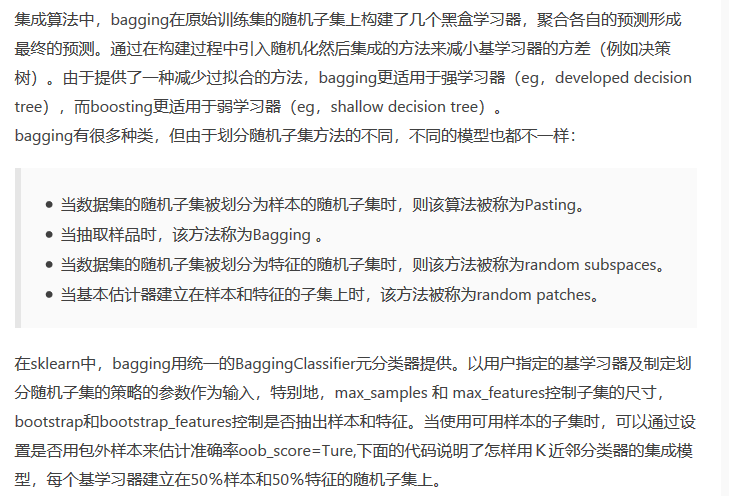

算法示意图：
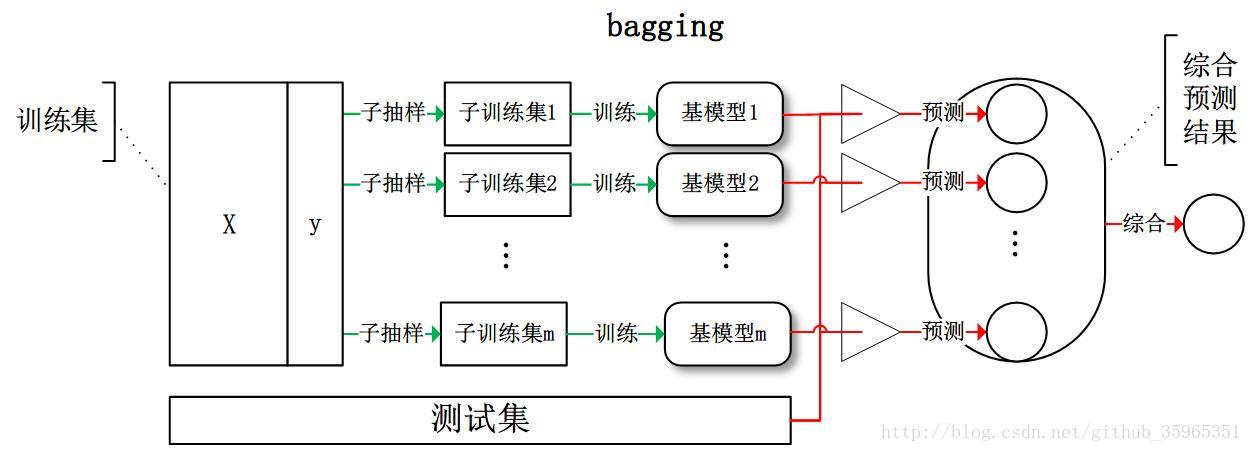

    class sklearn.ensemble.BaggingClassifier(base_estimator=None, n_estimators=10, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)

其中各个参数的意思为:
    
    base_estimator : 对象或无，可选（默认=无）基本估计量适合数据集的随机子集。如果为None，则基本估计量为决策树。
    n_estimators : int，可选（默认值为10） 集合中的基本估计量。
    max_samples : int或float，可选（默认值= 1.0） 从X抽取以训练每个基本估计量的样本数。
        如果为int，则抽取样本 max_samples。
        如果float，则抽取本 max_samples * X.shape[0]
    max_features : int或float，可选（默认值= 1.0） 从X绘制以训练每个基本估计量的要素数量。
        如果为int，则绘制特征 max_features。
        如果是浮动的，则绘制特征 max_features * X.shape[1]
    bootstrap : 布尔值，可选（默认= True）
        是否抽取样本进行替换。如果为False，则执行不替换的采样。
    oob_score : 布尔变量，可选（默认为False） 是否使用现成的样本来估计泛化误差。
    warm_start : 布尔变量，可选（默认= False） 设置为True时，请重用上一个调用的解决方案以适合并为集合添加更多估计量，否则，仅适合一个全新的集合。
    n_jobs : int或None（可选）（默认为None） fit和 并行运行的作业数predict。None除非joblib.parallel_backend上下文中，否则表示1 。-1表示使用所有处理器。
    random_state : 整型，RandomState实例或无，可选（默认值：无）
        如果为int，则random_state是随机数生成器使用的种子；否则为false。

In [26]:
# 基于KNN的bagging 
from sklearn.ensemble import BaggingClassifier

from sklearn.neighbors import KNeighborsClassifier
model = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.5, max_features=0.5)

fit(X_train, y_train, X_test, model)

[1 1 1 0 1 1 0 2 2 2 1 0 2 2 2 2 1 2 2 0 0 0 0 2 2 0 0 0 2 0 0 2 2 2 1 0 2
 0 2 2 1 1 1 2 2]
{'base_estimator__algorithm': 'auto', 'base_estimator__leaf_size': 30, 'base_estimator__metric': 'minkowski', 'base_estimator__metric_params': None, 'base_estimator__n_jobs': None, 'base_estimator__n_neighbors': 5, 'base_estimator__p': 2, 'base_estimator__weights': 'uniform', 'base_estimator': KNeighborsClassifier(), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
model得分： 0.9619047619047619


In [40]:
# logstic回归
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

model = BaggingClassifier(LogisticRegression(),
                            max_samples=0.5, max_features=0.5)

fit(X_train, y_train, X_test, model)

[1 1 2 0 1 1 0 2 2 2 1 0 2 2 2 2 1 2 2 0 0 0 0 2 2 0 0 0 2 0 0 2 2 2 1 0 2
 0 1 1 1 1 1 2 2]
{'base_estimator__C': 1.0, 'base_estimator__class_weight': None, 'base_estimator__dual': False, 'base_estimator__fit_intercept': True, 'base_estimator__intercept_scaling': 1, 'base_estimator__l1_ratio': None, 'base_estimator__max_iter': 100, 'base_estimator__multi_class': 'auto', 'base_estimator__n_jobs': None, 'base_estimator__penalty': 'l2', 'base_estimator__random_state': None, 'base_estimator__solver': 'lbfgs', 'base_estimator__tol': 0.0001, 'base_estimator__verbose': 0, 'base_estimator__warm_start': False, 'base_estimator': LogisticRegression(), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
model得分： 0.8952380952380953


In [41]:
# 贝叶斯
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB

model = BaggingClassifier(GaussianNB(),
                            max_samples=0.5, max_features=0.5)

fit(X_train, y_train, X_test, model)

[1 1 2 0 1 1 0 2 2 2 1 0 2 2 2 2 1 2 2 0 0 0 0 2 2 0 0 0 2 0 0 2 2 2 1 0 2
 0 2 2 1 1 1 2 2]
{'base_estimator__priors': None, 'base_estimator__var_smoothing': 1e-09, 'base_estimator': GaussianNB(), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
model得分： 0.9428571428571428


In [27]:
# 基于决策树DT的bagging
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

model_tree = tree.DecisionTreeClassifier(criterion='gini', max_depth=None, 
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
    max_features=None, random_state=None, max_leaf_nodes=None, 
    min_impurity_decrease=0.0, min_impurity_split=None,
     class_weight=None, presort=False)

fit(X_train, y_train, X_test, model)

[1 1 2 0 1 1 0 2 2 2 1 0 2 2 2 2 1 2 2 0 0 0 0 2 2 0 0 0 2 0 0 2 2 2 1 0 2
 0 2 2 1 1 1 2 2]
{'base_estimator__algorithm': 'auto', 'base_estimator__leaf_size': 30, 'base_estimator__metric': 'minkowski', 'base_estimator__metric_params': None, 'base_estimator__n_jobs': None, 'base_estimator__n_neighbors': 5, 'base_estimator__p': 2, 'base_estimator__weights': 'uniform', 'base_estimator': KNeighborsClassifier(), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
model得分： 0.9619047619047619


In [42]:
# 基于SVM的bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

model = BaggingClassifier(SVC(),
                            max_samples=0.5, max_features=0.5)

fit(X_train, y_train, X_test, model)

[1 1 1 0 1 1 0 2 2 2 1 0 2 2 2 2 1 2 2 0 0 0 0 2 2 0 0 0 2 0 0 2 2 2 1 0 2
 0 2 1 1 1 1 2 2]
{'base_estimator__C': 1.0, 'base_estimator__break_ties': False, 'base_estimator__cache_size': 200, 'base_estimator__class_weight': None, 'base_estimator__coef0': 0.0, 'base_estimator__decision_function_shape': 'ovr', 'base_estimator__degree': 3, 'base_estimator__gamma': 'scale', 'base_estimator__kernel': 'rbf', 'base_estimator__max_iter': -1, 'base_estimator__probability': False, 'base_estimator__random_state': None, 'base_estimator__shrinking': True, 'base_estimator__tol': 0.001, 'base_estimator__verbose': False, 'base_estimator': SVC(), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
model得分： 0.9523809523809523


In [47]:
# 定义多层感知机分类算法
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier

model = BaggingClassifier(MLPClassifier(),n_estimators =3,
                            max_samples=0.5, max_features=0.5)

fit(X_train, y_train, X_test, model)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[1 1 1 0 1 1 0 2 2 2 1 0 2 2 2 2 1 2 2 0 0 0 0 2 2 0 0 0 2 0 0 2 2 2 1 0 2
 0 2 1 1 1 1 2 1]
{'base_estimator__activation': 'relu', 'base_estimator__alpha': 0.0001, 'base_estimator__batch_size': 'auto', 'base_estimator__beta_1': 0.9, 'base_estimator__beta_2': 0.999, 'base_estimator__early_stopping': False, 'base_estimator__epsilon': 1e-08, 'base_estimator__hidden_layer_sizes': (100,), 'base_estimator__learning_rate': 'constant', 'base_estimator__learning_rate_init': 0.001, 'base_estimator__max_fun': 15000, 'base_estimator__max_iter': 200, 'base_estimator__momentum': 0.9, 'base_estimator__n_iter_no_change': 10, 'base_estimator__nesterovs_momentum': True, 'base_estimator__power_t': 0.5, 'base_estimator__random_state': None, 'base_estimator__shuffle': True, 'base_estimator__solver': 'adam', 'base_estimator__tol': 0.0001, 'base_estimator__validation_fraction': 0.1, 'base_estimator__verbose': False, 'base_estimator__warm_start': False, 'base_estimator': MLPClassifier(), 'bootstrap': True, '

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)

此为未收敛警告，这里不用管他

## stacking算法 

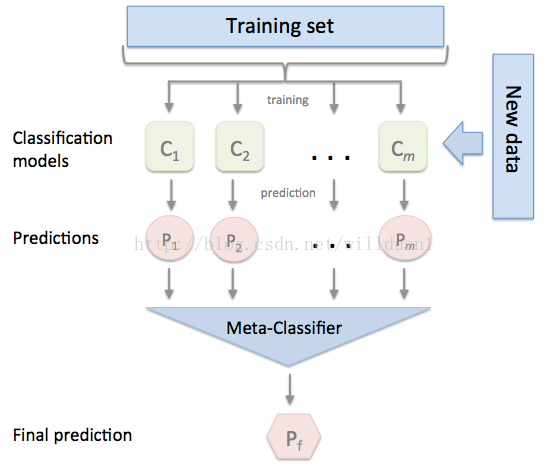

StackingClassifier 使用API及参数解析：
    
    StackingClassifier(classifiers, meta_classifier, use_probas=False, average_probas=False, verbose=0, use_features_in_secondary=False)

参数：
    
    classifiers : 基分类器，数组形式，[cl1, cl2, cl3]. 每个基分类器的属性被存储在类属性 self.clfs_.
    meta_classifier : 目标分类器，即将前面分类器合起来的分类器
    use_probas : bool (default: False) ，如果设置为True， 那么目标分类器的输入就是前面分类输出的类别概率值而不是类别标签
    average_probas : bool (default: False)，用来设置上一个参数当使用概率值输出的时候是否使用平均值。
    verbose : int, optional (default=0)。用来控制使用过程中的日志输出，当 verbose = 0时，什么也不输出， verbose = 1，输出回归器的序号和名字。verbose = 2，输出详细的参数信息。verbose > 2, 自动将verbose设置为小于2的，verbose -2.
    use_features_in_secondary : bool (default: False). 如果设置为True，那么最终的目标分类器就被基分类器产生的数据和最初的数据集同时训练。如果设置为False，最终的分类器只会使用基分类器产生的数据训练。


属性：

    clfs_ : 每个基分类器的属性，list, shape 为 [n_classifiers]。
    meta_clf_ : 最终目标分类器的属性

方法：

    fit(X, y)
    fit_transform(X, y=None, fit_params)
    get_params(deep=True)，如果是使用sklearn的GridSearch方法，那么返回分类器的各项参数。
    predict(X)
    predict_proba(X)
    score(X, y, sample_weight=None)， 对于给定数据集和给定label，返回评价accuracy
    set_params(params)，设置分类器的参数，params的设置方法和sklearn的格式一样

In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X, y = iris.data[:, 1:3], iris.target

In [2]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier

from mlxtend.classifier import StackingClassifier

In [5]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()

I. 最基本的使用方法，即使用前面分类器产生的特征输出作为最后总的meta-classifier的输入数据

In [13]:
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)
print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):
 
    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.95 (+/- 0.01) [Random Forest]
Accuracy: 0.91 (+/- 0.02) [Naive Bayes]
Accuracy: 0.95 (+/- 0.02) [StackingClassifier]


In [25]:
sclf.fit(X, y)
#sclf.get_params(deep=True)

StackingClassifier(classifiers=[KNeighborsClassifier(n_neighbors=1),
                                RandomForestClassifier(random_state=1),
                                GaussianNB()],
                   meta_classifier=LogisticRegression())

In [22]:
sclf.score(X, y, sample_weight=None),sclf.predict(X),sclf.predict_proba(X)[:8,:]

(0.9866666666666667,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 array([[9.59856505e-01, 4.01367666e-02, 6.72831560e-06],
        [9.59856505e-01, 4.01367666e-02, 6.72831560e-06],
        [9.59856505e-01, 4.01367666e-02, 6.72831560e-06],
        [9.59856505e-01, 4.01367666e-02, 6.72831560e-06],
        [9.59856505e-01, 4.01367666e-02, 6.72831560e-06],
        [9.59856505e-01, 4.01367666e-02, 6.72831560e-06],
        [9.59856505e-01, 4.01367666e-02, 6.72831560e-06],
        [9.59856505e-01, 4.01367666e-02, 6.72831560e-06]]))

II. 另一种使用第一层基本分类器产生的类别概率值作为meta-classfier的输入，这种情况下需要将StackingClassifier的参数设置为 use_probas=True。如果将参数设置为 average_probas=True，那么这些基分类器对每一个类别产生的概率值会被平均，否则会拼接。

In [7]:
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                          use_probas=True,
                          average_probas=False,
                          meta_classifier=lr)
 
print('3-fold cross validation:\n')
 
for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):
 
    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.91 (+/- 0.01) [KNN]
Accuracy: 0.95 (+/- 0.01) [Random Forest]
Accuracy: 0.91 (+/- 0.02) [Naive Bayes]
Accuracy: 0.92 (+/- 0.02) [StackingClassifier]


III. 另外一种方法是对训练基中的特征维度进行操作的，这次不是给每一个基分类器全部的特征，而是给不同的基分类器分不同的特征，即比如基分类器1训练前半部分特征，基分类器2训练后半部分特征（可以通过sklearn 的pipelines 实现）。最终通过StackingClassifier组合起来。

In [12]:
from mlxtend.classifier import StackingClassifier
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

ModuleNotFoundError: No module named 'sklearn.externals.joblib'

In [11]:
pipe1 = make_pipeline(ColumnSelector(cols=(0, 2)),
                      LogisticRegression())
pipe2 = make_pipeline(ColumnSelector(cols=(1, 2, 3)),
                      LogisticRegression())
 
sclf = StackingClassifier(classifiers=[pipe1, pipe2], 
                          meta_classifier=LogisticRegression())
 
sclf.fit(X, y)

NameError: name 'ColumnSelector' is not defined

# 随机森林(RF)

## 2.决策树的bagging 

In [29]:
# 随机森林示例
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

fit(X_train, y_train, X_test, model)

[1 1 2 0 1 1 0 2 2 2 1 0 2 2 2 2 1 2 2 0 0 0 0 2 2 0 0 0 2 0 0 2 2 2 1 0 2
 0 2 2 1 1 1 2 2]
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
model得分： 0.9904761904761905


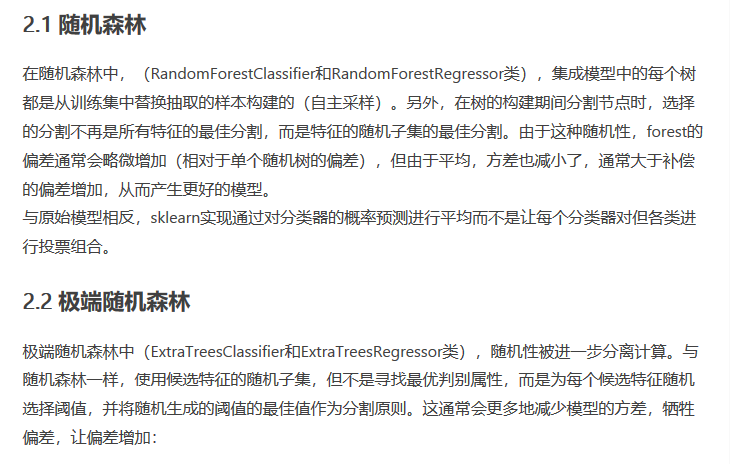

In [30]:
# RF随机森林
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
    random_state=0)

fit(X_train, y_train, X_test, model)

[1 1 2 0 1 1 0 2 2 2 1 0 2 2 2 2 1 2 2 0 0 0 0 2 2 0 0 0 2 0 0 2 2 2 1 0 2
 0 2 2 1 1 1 2 1]
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 0, 'splitter': 'best'}
model得分： 1.0


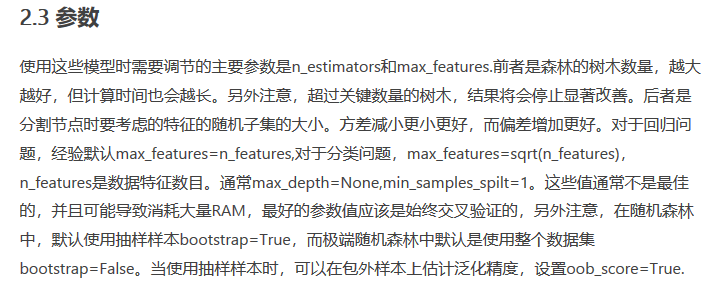

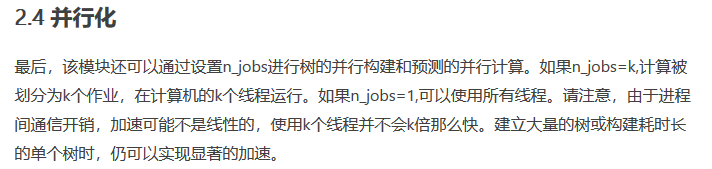

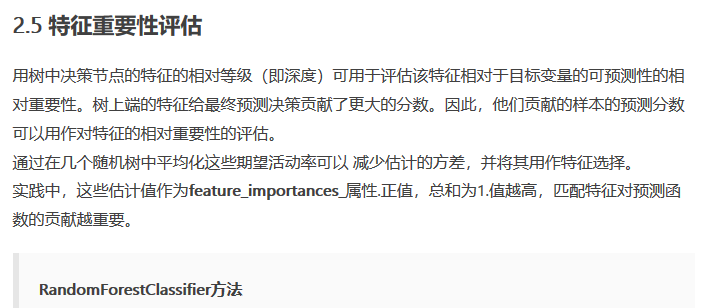

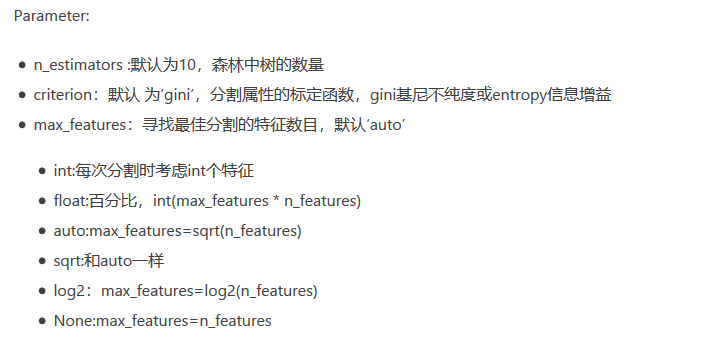

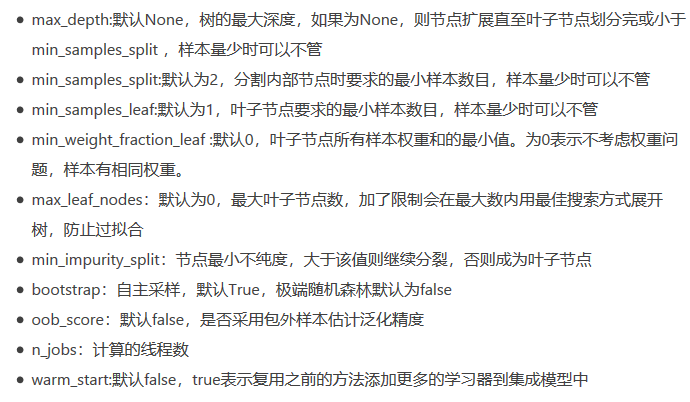

## 3.Adaboost 

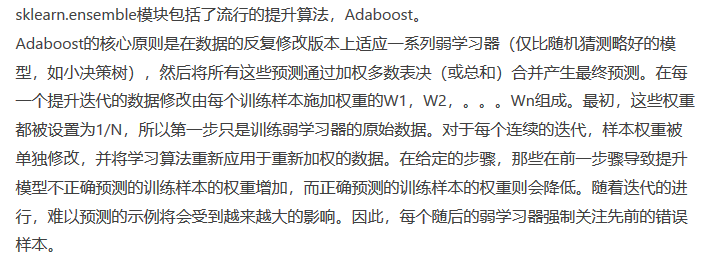

In [31]:
# 100个弱学习器的Adaboost分类器
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=100)

fit(X_train, y_train, X_test, model)

[1 1 2 0 1 1 0 2 2 2 1 0 2 2 2 2 1 2 2 0 0 0 0 2 2 0 0 0 2 0 0 2 2 2 1 0 2
 0 2 1 1 1 1 2 2]
{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 1.0, 'n_estimators': 100, 'random_state': None}
model得分： 0.9428571428571428


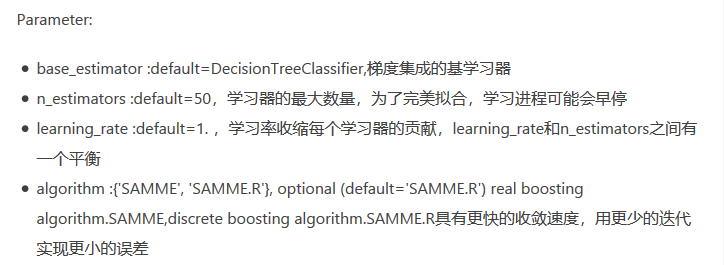

## 4. Gradient Tree Boosting

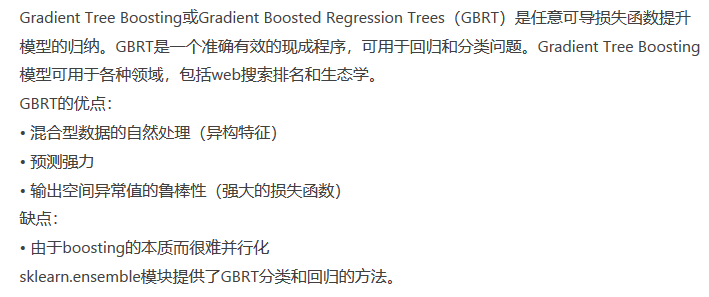

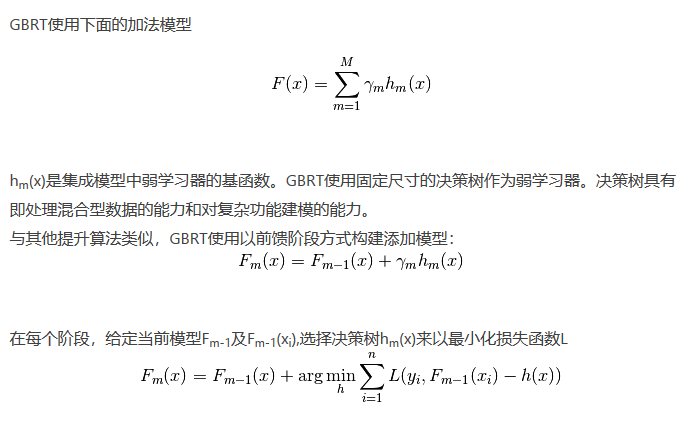

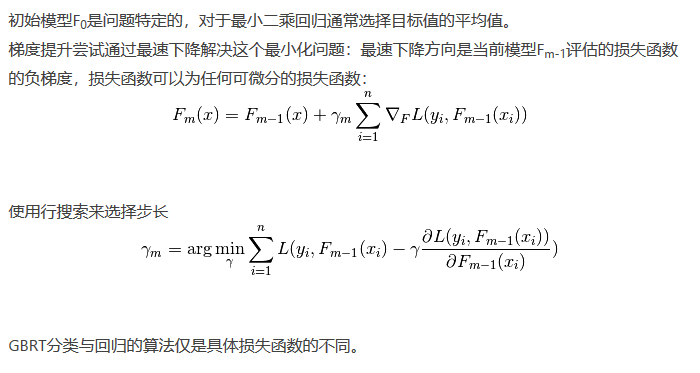

### 4.1 分类 

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train) 

fit(X_train, y_train, X_test, model)

[1 1 2 0 1 1 0 2 2 2 1 0 2 2 2 2 1 2 2 0 0 0 0 2 2 0 0 0 2 0 0 2 2 2 1 0 2
 0 2 2 1 1 1 2 2]
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 1.0, 'loss': 'deviance', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
model得分： 1.0


### 4.2 回归 

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
    max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)

fit(X_train, y_train, X_test, model)

[ 1.02162025e+00  9.94937412e-01  2.02696935e+00 -7.50383539e-04
  1.01962670e+00  1.05059306e+00 -7.50383539e-04  1.96521504e+00
  2.08596244e+00  1.96521504e+00  1.02428056e+00 -7.50383539e-04
  2.05394010e+00  2.01422207e+00  1.94962493e+00  1.99189471e+00
  9.77311073e-01  1.97999986e+00  1.96521504e+00  4.62190991e-02
 -7.50383539e-04 -7.50383539e-04  3.92480349e-02  2.04255945e+00
  1.99558997e+00 -7.72144774e-03 -7.50383539e-04 -7.50383539e-04
  2.01218452e+00 -7.50383539e-04  4.62190991e-02  2.01218452e+00
  2.03089823e+00  2.00697062e+00  1.02105888e+00  3.92480349e-02
  2.01218452e+00 -7.50383539e-04  2.05762507e+00  1.77525650e+00
  1.03402202e+00  9.80295883e-01  1.01962670e+00  2.03886419e+00
  1.50456770e+00]
{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 1, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples

# 一个实例

In [27]:
from sklearn.datasets import load_iris
# 用决策树作为基础模型
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
# bagging模型
def RandomForestBagging(X, y):
    '''
    随机森林
    :param X:
    :param y:
    :return:
    '''
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    rd = RandomForestClassifier(
        n_estimators=100,
        criterion="gini",
        max_depth=4,
    )
    rd.fit(x_train, y_train)
    print("随机森林的测试集上的准确率:", rd.score(x_test, y_test))
    print("随机森林的训练集上的准确率:", rd.score(x_train, y_train))

In [29]:
# boosting模型汇总
def GardientBoosting(X, y):
    '''
    梯度提升算法
    :return:
    '''
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0)
    gbrt.fit(x_train, y_train)
    print("梯度提升回归树的测试集上准确率:", gbrt.score(x_test, y_test))
    print("梯度提升回归树的训练集上准确率:", gbrt.score(x_train, y_train))

In [30]:
def AdaBoosting(X, y):
    '''
    自适应提升算法
    :param X:
    :param y:
    :return:
    '''
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    ada = AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=100,
        learning_rate=0.5,
        algorithm='SAMME.R',
        random_state=0
    )
    ada.fit(x_train, y_train)
    print("自适应提升算法的测试集上准确率:", ada.score(x_test, y_test))
    print("自适应提升算法的训练集上准确率:", ada.score(x_train, y_train))

In [48]:
# stacking模型汇总
def selfsuanfa(x_train, y_train):
 
    from sklearn.svm import SVC
    from sklearn.naive_bayes import GaussianNB
    from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.neural_network import MLPClassifier
 
    SEED = 1
    nb = GaussianNB()
    svc = SVC(C=100, probability=True)
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=100, random_state=SEED)
    nn = MLPClassifier((80, 10), early_stopping=False, random_state=SEED)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=SEED)
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=SEED)
 
 
    # 第一层定义好了
    nb.fit(x_train, y_train)
    data1 = nb.predict(x_train).reshape(-1, 1)
    svc.fit(x_train, y_train)
    data2 = svc.predict(x_train).reshape(-1, 1)
    knn.fit(x_train, y_train)
    data3 = knn.predict(x_train).reshape(-1, 1)
    data_level1 = pd.DataFrame(data1, columns=['nb'])
    data_level1['svc'] = data2
    data_level1['knn'] = data3
    data_level1['real'] = y_train.ravel()
    # print(data_level1)
 
    # 第二层
    X1 = data_level1[['nb', 'svc', 'knn']]
    y1 = data_level1['real']
    x_train1 = X1
    y_train1 = y1.ravel()
    nn.fit(x_train1, y_train1)
    data11 = nn.predict(x_train1).reshape(-1, 1)
    data_level2 = pd.DataFrame(data11, columns=['nn'])
 
    gb.fit(x_train1, y_train1.ravel())
    data22 = gb.predict(x_train1).reshape(-1, 1)
    data_level2['gb'] = data22
 
    lr.fit(x_train1, y_train1.ravel())
    data33 = lr.predict(x_train1).reshape(-1, 1)
    data_level2['lr'] = data33
    data_level2['real2'] = y_train1
    # print(data_level2)
 
    # 第三层
    X2 = data_level2[['nn', 'gb', 'lr']]
    y2 = data_level2[['real2']]
    x_train2 = X2
    y_train2 = y2
    rf.fit(x_train2, y_train2)
    print("最强集成算法的测试集上准确率:", rf.score(x_train2, y_train2))

In [49]:
if __name__ == '__main__':
    iris = load_iris()
    X = iris.data
    y = iris.target
    # model1(X, y)
    RandomForestBagging(X, y)  # 随机森林算法
    GardientBoosting(X, y)  # 梯度提升算法
    AdaBoosting(X, y)   # 自适应提升算法
 
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    # 训练集上的准确率
    selfsuanfa(x_train, y_train.ravel())   # 就这个算法，求老铁补充一下

随机森林的测试集上的准确率: 0.9777777777777777
随机森林的训练集上的准确率: 1.0
梯度提升回归树的测试集上准确率: 0.9333333333333333
梯度提升回归树的训练集上准确率: 1.0
自适应提升算法的测试集上准确率: 0.9111111111111111
自适应提升算法的训练集上准确率: 0.9619047619047619


C:\Users\asus\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


最强集成算法的测试集上准确率: 0.9809523809523809


C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:58: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
